In [1]:
# import library standard
import numpy as np
import pandas as pd
import sys
sys.path.append('../')

from statsmodels.stats.proportion import power_proportions_2indep, test_proportions_2indep
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.power import tt_ind_solve_power
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_ab_testing = pd.read_csv('../data/ab.csv')
data_ab_testing['date'] = pd.to_datetime(data_ab_testing['timestamp']).dt.date

In [4]:
data_ab_testing

,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,2017-01-03
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,2017-01-12
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,2017-01-22
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,2017-01-15


In [5]:
ab_test = data_ab_testing.groupby("landing_page").agg({"converted":['count','sum']}).reset_index().values
ab_test_result = pd.DataFrame(ab_test,columns = ["group","visit","sales"] )
ab_test_result["conversion_rate"] = ab_test_result["sales"]/ab_test_result["visit"]
ab_test_result

,group,visit,sales,conversion_rate
0,new_page,147239,17498,0.118841
1,old_page,147239,17739,0.120478


In [6]:
ab_test_result["sales"][1]

17739

In [7]:
old_new_result = test_proportions_2indep(count1=ab_test_result["sales"][1], 
                                         nobs1=ab_test_result["visit"][1], 
                                         count2=ab_test_result["sales"][0], 
                                         nobs2=ab_test_result["visit"][0], 
                                         alternative="two-sided")
print(old_new_result)

statistic = 1.3683036739186678
pvalue = 0.17121704128136572
compare = diff
method = agresti-caffo
diff = 0.0016367945992569882
ratio = 1.0137730026288718
odds_ratio = 1.0156596381009457
variance = 1.4309075737183843e-06
alternative = two-sided
value = 0
tuple = (1.3683036739186678, 0.17121704128136572)


In [8]:
data_ab_unstack = data_ab_testing[['date', 'landing_page', 'converted']]
data_ab_unstack

,date,landing_page,converted
0,2017-01-21,old_page,0
1,2017-01-12,old_page,0
2,2017-01-11,new_page,0
3,2017-01-08,new_page,0
4,2017-01-21,old_page,1
...,...,...,...
294473,2017-01-03,old_page,0
294474,2017-01-12,old_page,0
294475,2017-01-22,old_page,0
294476,2017-01-15,old_page,0


In [9]:
data_ab_unstack = data_ab_unstack.groupby(["date", 'landing_page']).agg(['count','sum']).unstack().reset_index()
data_ab_unstack

date converted                           
                             count               sum         
landing_page              new_page old_page new_page old_page
0             2017-01-02      2888     2895      345      365
1             2017-01-03      6712     6682      763      759
2             2017-01-04      6618     6666      771      812
3             2017-01-05      6616     6508      757      802
4             2017-01-06      6825     6703      849      777
5             2017-01-07      6683     6698      774      807
6             2017-01-08      6782     6782      819      807
7             2017-01-09      6712     6727      794      806
8             2017-01-10      6787     6736      858      763
9             2017-01-11      6772     6781      781      812
10            2017-01-12      6730     6592      825      804
11            2017-01-13      6605     6633      737      776
12            2017-01-14      6687     6642      799      842
13            2017-01-15      6644     6805      757      823
14            2017-01-16      6637     6690      793      818
15            2017-01-17      6612     6710      837      825
16            2017-01-18      6699     6586      835      820
17            2017-01-19      6639     6654      774      801
18            2017-01-20      6771     6622      796      764
19            2017-01-21      6634     6841      768      863
20            2017-01-22      6748     6675      797      794
21            2017-01-23      6700     6811      813      855
22            2017-01-24      3738     3800      456      444

In [10]:
# convert from df to values 
data_ab_unstack = data_ab_unstack.values

In [11]:
# from values create df
ab_testing1 = pd.DataFrame(data_ab_unstack, 
                          columns=['date', 'new_page_visit', 'old_page_visit', 'new_page_sales', 'old_page_sales'])
ab_testing1

,date,new_page_visit,old_page_visit,new_page_sales,old_page_sales
0,2017-01-02,2888,2895,345,365
1,2017-01-03,6712,6682,763,759
2,2017-01-04,6618,6666,771,812
3,2017-01-05,6616,6508,757,802
4,2017-01-06,6825,6703,849,777
5,2017-01-07,6683,6698,774,807
6,2017-01-08,6782,6782,819,807
7,2017-01-09,6712,6727,794,806
8,2017-01-10,6787,6736,858,763
9,2017-01-11,6772,6781,781,812


In [12]:
ab_testing1["new_conversion_rate"] = ab_testing1["new_page_sales"]/ab_testing1["new_page_visit"]
ab_testing1["old_conversion_rate"] = ab_testing1["old_page_sales"]/ab_testing1["old_page_visit"]
ab_testing1

,date,new_page_visit,old_page_visit,new_page_sales,old_page_sales,new_conversion_rate,old_conversion_rate
0,2017-01-02,2888,2895,345,365,0.11946,0.126079
1,2017-01-03,6712,6682,763,759,0.113677,0.113589
2,2017-01-04,6618,6666,771,812,0.1165,0.121812
3,2017-01-05,6616,6508,757,802,0.11442,0.123233
4,2017-01-06,6825,6703,849,777,0.124396,0.115918
5,2017-01-07,6683,6698,774,807,0.115816,0.120484
6,2017-01-08,6782,6782,819,807,0.120761,0.118991
7,2017-01-09,6712,6727,794,806,0.118296,0.119816
8,2017-01-10,6787,6736,858,763,0.126418,0.113272
9,2017-01-11,6772,6781,781,812,0.115328,0.119746


In [13]:
def p_value(x):
    result = test_proportions_2indep(count1=x["old_page_sales"], 
                                   nobs1=x["old_page_visit"], 
                                   count2=x["new_page_sales"], 
                                   nobs2=x["new_page_visit"],
                                   alternative="two-sided")
    return result[1]

ab_testing1['p_value'] = ab_testing1.apply(p_value, axis=1)

In [14]:
# get name day
ab_testing1['day'] = pd.to_datetime(ab_testing1['date']).dt.day_name()

In [34]:
ab_testing1

,date,new_page_visit,old_page_visit,new_page_sales,old_page_sales,new_conversion_rate,old_conversion_rate,p_value,day
0,2017-01-02,2888,2895,345,365,0.11946,0.126079,0.443689,Monday
1,2017-01-03,6712,6682,763,759,0.113677,0.113589,0.987245,Tuesday
2,2017-01-04,6618,6666,771,812,0.1165,0.121812,0.345055,Wednesday
3,2017-01-05,6616,6508,757,802,0.11442,0.123233,0.118891,Thursday
4,2017-01-06,6825,6703,849,777,0.124396,0.115918,0.129690,Friday
5,2017-01-07,6683,6698,774,807,0.115816,0.120484,0.403241,Saturday
6,2017-01-08,6782,6782,819,807,0.120761,0.118991,0.751215,Sunday
7,2017-01-09,6712,6727,794,806,0.118296,0.119816,0.785724,Monday
8,2017-01-10,6787,6736,858,763,0.126418,0.113272,0.018636,Tuesday
9,2017-01-11,6772,6781,781,812,0.115328,0.119746,0.424785,Wednesday


In [36]:
ab_testing1.to_csv('../data_clean/data_ab_testing.csv', sep=';')

In [37]:
ab_testing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 23 non-null     object 
 1   new_page_visit       23 non-null     object 
 2   old_page_visit       23 non-null     object 
 3   new_page_sales       23 non-null     object 
 4   old_page_sales       23 non-null     object 
 5   new_conversion_rate  23 non-null     object 
 6   old_conversion_rate  23 non-null     object 
 7   p_value              23 non-null     float64
 8   day                  23 non-null     object 
dtypes: float64(1), object(8)
memory usage: 1.7+ KB


In [17]:
ab_result = data_ab_testing.groupby("date").agg({"converted":['count','sum']}).reset_index().values
ab_testing_result = pd.DataFrame(ab_result,columns = ["date","visit","sales"])

In [18]:
ab_power = ab_testing_result.set_index('date')
ab_power

,visit,sales
date,,
2017-01-02,5783,710
2017-01-03,13394,1522
2017-01-04,13284,1583
2017-01-05,13124,1559
2017-01-06,13528,1626
2017-01-07,13381,1581
2017-01-08,13564,1626
2017-01-09,13439,1600
2017-01-10,13523,1621


In [19]:
ab_power = ab_power.reset_index()

In [20]:
ab_power["conversion_rate"] = ab_power["sales"]/ab_power["visit"]
ab_power

,date,visit,sales,conversion_rate
0,2017-01-02,5783,710,0.122774
1,2017-01-03,13394,1522,0.113633
2,2017-01-04,13284,1583,0.119166
3,2017-01-05,13124,1559,0.11879
4,2017-01-06,13528,1626,0.120195
5,2017-01-07,13381,1581,0.118153
6,2017-01-08,13564,1626,0.119876
7,2017-01-09,13439,1600,0.119056
8,2017-01-10,13523,1621,0.11987
9,2017-01-11,13553,1593,0.117539


In [21]:
# inisiasi test_split dan relative_effect
split = pd.DataFrame({'test_split':[0.5, 0.4, 0.3, 0.2]})
effect = pd.DataFrame({'relative_effect' : [0.15, 0.1, 0.05]})

# merge sales summary dengan split
data = pd.merge(ab_power, split, how='cross')

# merge sales summary dan split dengan effect 
ab_merge = pd.merge(data, effect, how='cross')

ab_merge

,date,visit,sales,conversion_rate,test_split,relative_effect
0,2017-01-02,5783,710,0.122774,0.5,0.15
1,2017-01-02,5783,710,0.122774,0.5,0.10
2,2017-01-02,5783,710,0.122774,0.5,0.05
3,2017-01-02,5783,710,0.122774,0.4,0.15
4,2017-01-02,5783,710,0.122774,0.4,0.10
...,...,...,...,...,...,...
271,2017-01-24,7538,900,0.119395,0.3,0.10
272,2017-01-24,7538,900,0.119395,0.3,0.05
273,2017-01-24,7538,900,0.119395,0.2,0.15
274,2017-01-24,7538,900,0.119395,0.2,0.10


In [22]:
# def power function
def power(x):
    conversion_rate = x['conversion_rate']
    relative_effect = x['relative_effect']
    num_trafic = x['visit']
    test_split = x['test_split']

    power_test = power_proportions_2indep(diff= conversion_rate*relative_effect,
                                          prop2=conversion_rate,
                                          nobs1=num_trafic*test_split,
                                          ratio=(1-test_split)/test_split,
                                          alpha=0.05,
                                          alternative='two-sided',
                                          return_results=True)
    
    return power_test.power

In [23]:
# menambah column power dan apply function
ab_merge['power'] = ab_merge.apply(power, axis=1)

ab_merge

,date,visit,sales,conversion_rate,test_split,relative_effect,power
0,2017-01-02,5783,710,0.122774,0.5,0.15,0.543384
1,2017-01-02,5783,710,0.122774,0.5,0.10,0.285760
2,2017-01-02,5783,710,0.122774,0.5,0.05,0.108371
3,2017-01-02,5783,710,0.122774,0.4,0.15,0.456432
4,2017-01-02,5783,710,0.122774,0.4,0.10,0.238260
...,...,...,...,...,...,...,...
271,2017-01-24,7538,900,0.119395,0.3,0.10,0.228090
272,2017-01-24,7538,900,0.119395,0.3,0.05,0.093957
273,2017-01-24,7538,900,0.119395,0.2,0.15,0.312342
274,2017-01-24,7538,900,0.119395,0.2,0.10,0.167567


In [41]:
ab_merge.to_csv('../data_clean/power_testing.csv', sep=';')

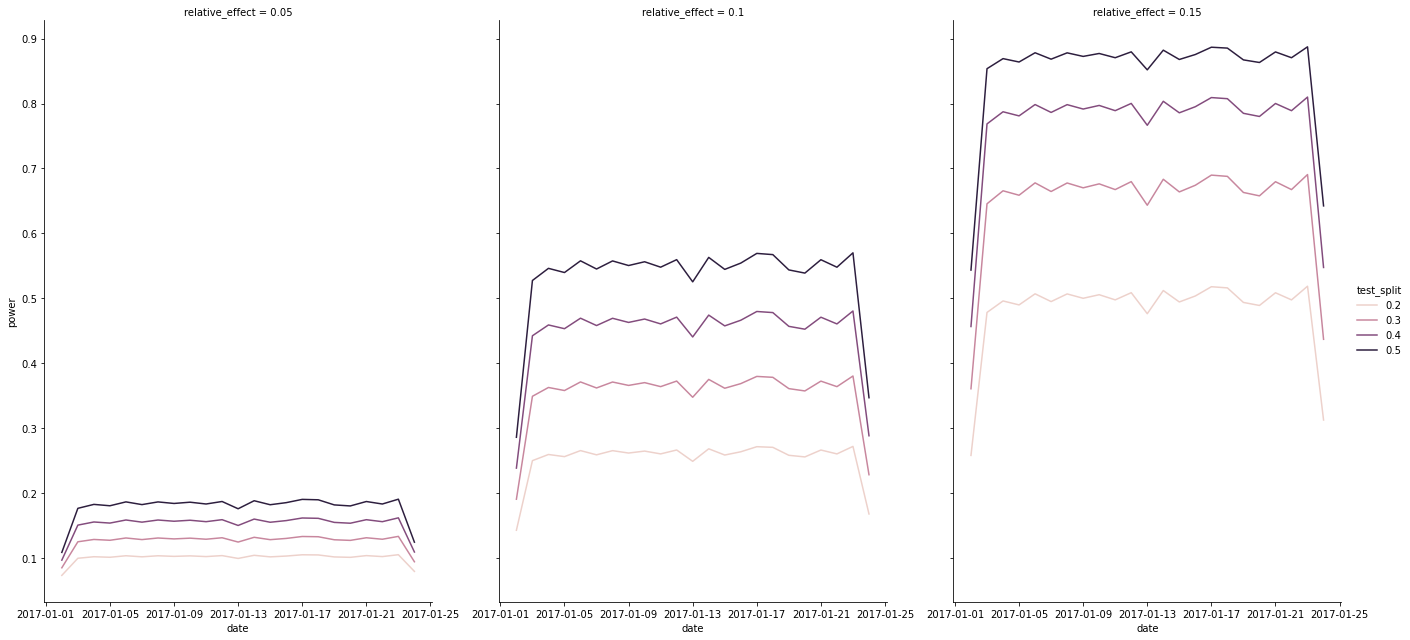

In [24]:
# relation week, test_split, relative_effect
sns.relplot(data=ab_merge,
            x="date", y="power",
            hue="test_split", col="relative_effect",
            height=9, aspect=.7, kind="line"
           )